<a href="https://colab.research.google.com/github/Irina-Bogdanova-bioinformatician/BI_ML_2023/blob/fruites_and_vegetables_classifier/fruites_and_vegetables_classifier/fruites_and_vegetables_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6478 sha256=af18f0f32999b3dad088cca4574434fbcce595ef40d5178bb1d87f0d9cacbef4
  Stored in directory: /root/.cache/pip/wheels/ed/08/9e/f0a977dfe55051a07e21af89200125d65f1efa60cbac61ed88
Successfully built uuid


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

import torch
import os
import jovian
import torchvision
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torchvision.models as models
from torch.utils.data.dataloader import DataLoader

import tensorflow as tf
from keras.preprocessing.image  import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, load_img

%matplotlib inline
%config InlineBackend.figure_format='svg'

## Data downloading and exploration

The total number of images: 90483.

Training set size: 67692 images (one fruit or vegetable per image).

Test set size: 22688 images (one fruit or vegetable per image).

The number of classes: 131 (fruits and vegetables).

Image size: 100x100 pixels.

Filename format: image_index_100.jpg (e.g. 32_100.jpg) or r_image_index_100.jpg (e.g. r_32_100.jpg) or r2_image_index_100.jpg or r3_image_index_100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).


There is a new -major version- of the dataset under release. A test archive (named fruits-360-original-size.zip) was already loaded to Kaggle. The new version contains images at their original (captured) size.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"irinabogdanova","key":"ffbe7863c82e979f65eb3e1def4e4b7c"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:18<00:00, 89.2MB/s]
100% 1.28G/1.28G [00:18<00:00, 76.5MB/s]


In [ ]:
!unzip fruits.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/

In [ ]:
import os

train_path = "fruits-360_dataset/fruits-360/Training/"
test_path = "fruits-360_dataset/fruits-360/Test/"

types = os.listdir(train_path)
print(len(types), ' types of fruits and vegetables: ', types)

131  types of fruits and vegetables:  ['Tomato 1', 'Strawberry', 'Pomelo Sweetie', 'Cucumber Ripe 2', 'Cauliflower', 'Hazelnut', 'Potato Red Washed', 'Kohlrabi', 'Apple Granny Smith', 'Potato Sweet', 'Grape White 2', 'Grape Blue', 'Chestnut', 'Lemon Meyer', 'Tamarillo', 'Tomato 3', 'Maracuja', 'Ginger Root', 'Papaya', 'Raspberry', 'Pear', 'Tomato Cherry Red', 'Pepper Orange', 'Pepper Green', 'Tomato Maroon', 'Nectarine', 'Pear Forelle', 'Guava', 'Cucumber Ripe', 'Quince', 'Grape White 4', 'Onion Red Peeled', 'Onion Red', 'Mulberry', 'Blueberry', 'Pineapple', 'Corn Husk', 'Tomato Heart', 'Carambula', 'Passion Fruit', 'Nut Forest', 'Pomegranate', 'Mangostan', 'Lychee', 'Grapefruit Pink', 'Cantaloupe 2', 'Physalis with Husk', 'Limes', 'Peach Flat', 'Potato White', 'Corn', 'Watermelon', 'Pear 2', 'Lemon', 'Mandarine', 'Pepper Red', 'Peach 2', 'Orange', 'Kiwi', 'Pear Monster', 'Cantaloupe 1', 'Kumquats', 'Apple Red Yellow 2', 'Grape White', 'Fig', 'Tangelo', 'Apricot', 'Nut Pecan', 'Grape W

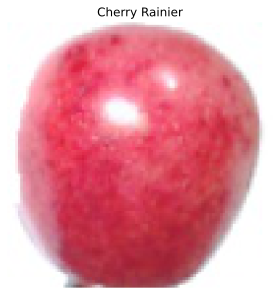

In [ ]:
img = load_img(train_path + "Cherry Rainier/0_100.jpg")
plt.imshow(img)
plt.title("Cherry Rainier")
plt.axis("off")
plt.show()

In [ ]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

(100, 100, 3)


## Data preparation and model building

**CNN**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.5, 
                   rotation_range=60,
                   width_shift_range=0.15,
                   height_shift_range=0.15)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    shuffle=True,
                                                    target_size = shape_of_image.shape[:2],
                                                    batch_size = 32,
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape), # 32 convolution filters used each of size 3x3
    tf.keras.layers.MaxPool2D((2,2)), # choose the best features via pooling

    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape), # 64 convolution filters used each of size 3x3
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(), # flatten since too many dimensions, we only want a classification output
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax') # output a softmax to squash the matrix into output probabilities
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

# Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.
# Optimizer - how the model is updated based on the data it sees and its loss function.
# Metrics - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
batch_size = 32

hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = 67692 // batch_size,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 22688 // batch_size
                   )


<ipython-input-42-00af3f0196e6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
2115/2115 [==============================] - 1033s 488ms/step - loss: 1.3661 - accuracy: 0.5788 - val_loss: 0.5498 - val_accuracy: 0.8185
Epoch 2/10
2115/2115 [==============================] - 1047s 495ms/step - loss: 0.4369 - accuracy: 0.8502 - val_loss: 0.2794 - val_accuracy: 0.9081
Epoch 3/10
2115/2115 [==============================] - 1031s 487ms/step - loss: 0.3083 - accuracy: 0.8945 - val_loss: 0.2239 - val_accuracy: 0.9250
Epoch 4/10
2115/2115 [==============================] - 1017s 481ms/step - loss: 0.2488 - accuracy: 0.9166 - val_loss: 0.1712 - val_accuracy: 0.9391
Epoch 5/10
2115/2115 [==============================] - 1056s 499ms/step - loss: 0.2210 - accuracy: 0.9258 - val_loss: 0.2307 - val_accuracy: 0.9386
Epoch 6/10
2115/2115 [==============================] - 1049s 496ms/step - loss: 0.1965 - accuracy: 0.9340 - val_loss: 0.1683 - val_accuracy: 0.9465
Epoch 7/10
2115/2115 [==============================] - 1007s 476ms/step - loss: 0.1805 - accuracy: 0.9411

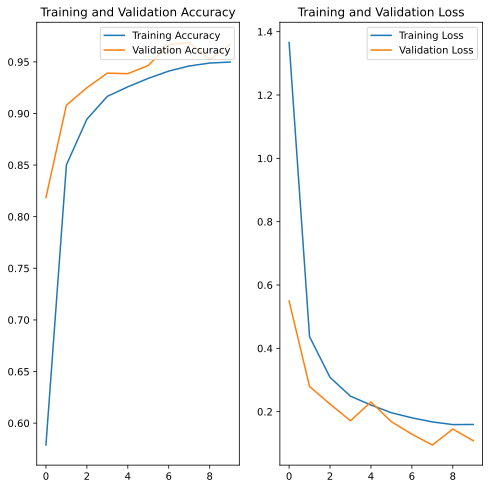

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
model.save('cnn_model_fruits')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r cnn_model_fruits/ drive/MyDrive/

In [ ]:
trained_model = tf.keras.models.load_model('drive/MyDrive/cnn_model_fruits')

trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 64)      

In [ ]:
from PIL import Image
from numpy import asarray


def classify_fruit(pic_path):
    
    img = load_img(pic_path)
    img = asarray(img) / 255.0
    img = img.reshape(-1,100,100,3)
    
    prediction = trained_model.predict(img)
    ans = np.argmax(prediction, axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    final_ans = labels[int(ans)]
    print('Predicted class: {}'.format(final_ans))
    return final_ans


In [ ]:
for pic in ["apricot.jpg", "banana.jpg", "clementine.jpg"]:
    classify_fruit(pic)

1/1 [==============================] - 0s 48ms/step
Predicted class: Apricot
1/1 [==============================] - 0s 41ms/step
Predicted class: Banana
1/1 [==============================] - 0s 49ms/step
Predicted class: Clementine
